In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import networkx as nx
import time

%matplotlib inline

In [2]:
def approximatePageRank(G, target_nodes, alpha, epsilon):

    p = {}
    r = target_nodes.copy()
    d = {}
    for n in target_nodes:
        d[n] = G.degree(n)


    queue = [key for key in r.keys() if (d[key] > 0) and (r[key] >= epsilon * d[key])]

    while(queue):

        node_u = queue[0]
        
        if node_u in p:
            p[node_u] += (1-alpha) * r[node_u]
        else:
            p[node_u] = (1-alpha) * r[node_u]
        
        r[node_u] = alpha * r[node_u] / 2

        for node_v in G.neighbors(node_u):
            if node_v in r:
                r[node_v] += r[node_u] / d[node_u]
            else:
                r[node_v] = r[node_u] / d[node_u]
                d[node_v] = G.degree(node_v)

        queue = [key for key in r.keys() if (d[key] > 0) and (r[key] >= epsilon * d[key])]

    return p


def arrayFromDict(p):

    p_values = list(p.values())
    p_keys = np.array(list(p.keys()))

    p_values = np.array(p_values) / sum(p_values)

    p_V = np.zeros(np.max(p_keys)+1)
    p_V[p_keys] = p_values

    return p_V

In [3]:
# select the node target
node_target = 100

# initialize the list with the stats
nodes_vector = [0] * 4
our_times_vector = [0] * 4
nx_times_vector = [0] * 4

# init some parameters
personalization_vector = {node_target : 1}
alpha = 0.85
epsilon = 1e-5

Name: 
Type: Graph
Number of nodes: 7440
Number of edges: 27794
Average degree:   7.4715

Our implementation of ApproximatePageRank of the node 100
Elapsed time: 1.841968 seconds
Networkx implementation of PageRank
Elapsed time: 2.923941 seconds



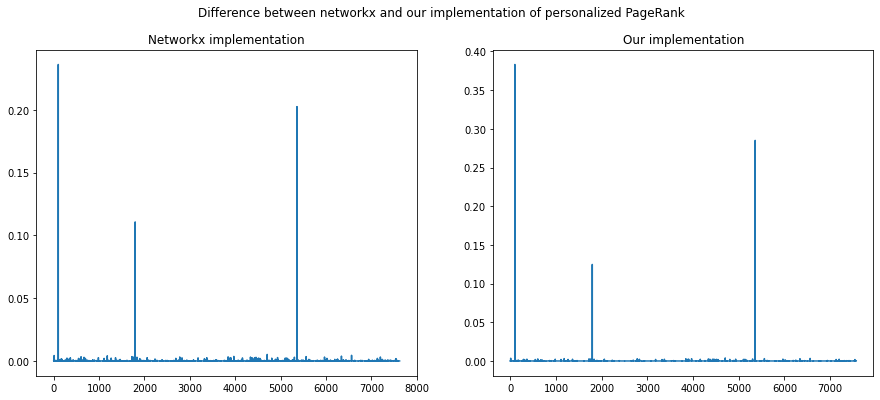

In [4]:
# Import a network with about 7k nodes
path = 'data/lastfm_asia_7000.csv'
G = nx.read_edgelist(path, delimiter=',', nodetype=int)
A = nx.linalg.graphmatrix.adjacency_matrix(G)
print(nx.info(G))
print()

# Save the number of nodes
nodes_vector[0] = G.number_of_nodes()

# Compute our Personalized PageRank and save the execution time
start = time.time()
p = approximatePageRank(G, personalization_vector, alpha, epsilon)
stop = time.time()
t = str(stop-start)[0:8]
our_times_vector[0] = float(t)
print('Our implementation of ApproximatePageRank of the node', node_target)
print('Elapsed time:', t, 'seconds')
p_vector = arrayFromDict(p)

# Compute networkx PageRank and save the execution time
start = time.time()
pr = nx.pagerank(G, personalization=personalization_vector, max_iter=20, weight=None)
stop = time.time()
t = str(stop-start)[0:8]
nx_times_vector[0] = float(t)
print('Networkx implementation of PageRank')
print('Elapsed time:', t, 'seconds\n')
pr_vector = arrayFromDict(pr)

# Plot the difference between the two solutions
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Difference between networkx and our implementation of personalized PageRank')
axs[0].plot(pr_vector)
axs[0].set_title('Networkx implementation')
axs[1].plot(p_vector)
axs[1].set_title('Our implementation')
plt.show()

Name: 
Type: Graph
Number of nodes: 22470
Number of edges: 171002
Average degree:  15.2205

Our implementation of ApproximatePageRank of the node 100
Elapsed time: 1.713093 seconds
Networkx implementation of PageRank
Elapsed time: 12.50272 seconds



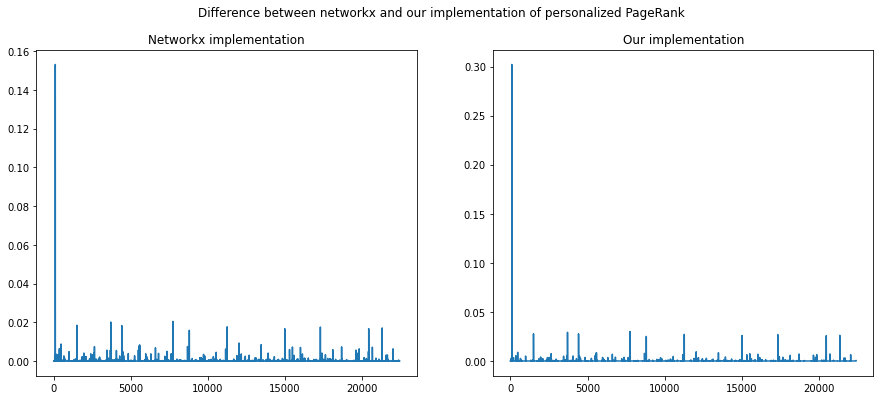

In [5]:
# Import a network with about 22k nodes
path = 'data/musae_facebook_22000.csv'
G = nx.read_edgelist(path, delimiter=',', nodetype=int)
A = nx.linalg.graphmatrix.adjacency_matrix(G)
print(nx.info(G))
print()

# Save the number of nodes
nodes_vector[1] = G.number_of_nodes()

# Compute our Personalized PageRank and save the execution time
start = time.time()
p = approximatePageRank(G, personalization_vector, alpha, epsilon)
stop = time.time()
t = str(stop-start)[0:8]
our_times_vector[1] = float(t)
print('Our implementation of ApproximatePageRank of the node', node_target)
print('Elapsed time:', t, 'seconds')
p_vector = arrayFromDict(p)

# Compute networkx PageRank and save the execution time
start = time.time()
pr = nx.pagerank(G, personalization=personalization_vector, max_iter=20, weight=None)
stop = time.time()
t = str(stop-start)[0:8]
nx_times_vector[1] = float(t)
print('Networkx implementation of PageRank')
print('Elapsed time:', t, 'seconds\n')
pr_vector = arrayFromDict(pr)

# Plot the difference between the two solutions
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Difference between networkx and our implementation of personalized PageRank')
axs[0].plot(pr_vector)
axs[0].set_title('Networkx implementation')
axs[1].plot(p_vector)
axs[1].set_title('Our implementation')
plt.show()

Name: 
Type: Graph
Number of nodes: 334863
Number of edges: 925872
Average degree:   5.5299

Our implementation of ApproximatePageRank of the node 100
Elapsed time: 5.133354 seconds
Networkx implementation of PageRank
Elapsed time: 37.13183 seconds



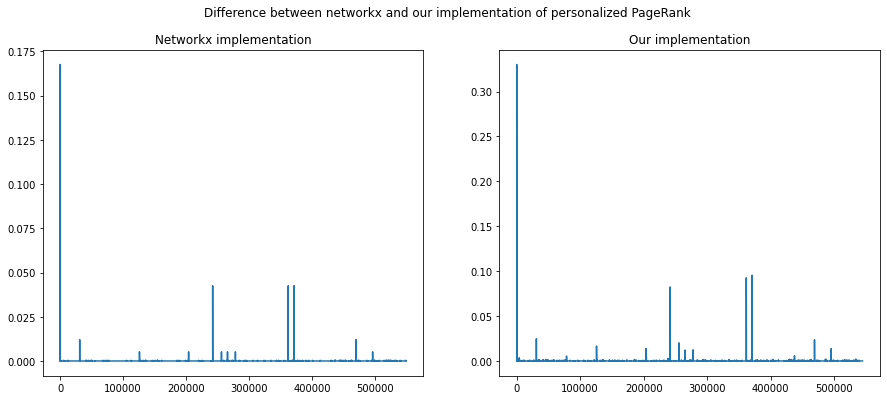

In [6]:
# Import a network with about 335k nodes
path = 'data/amazon_335000.txt'
G = nx.read_edgelist(path, delimiter='\t', nodetype=int)
A = nx.linalg.graphmatrix.adjacency_matrix(G)
print(nx.info(G))
print()

# Save the number of nodes
nodes_vector[2] = G.number_of_nodes()

# Compute our Personalized PageRank and save the execution time
start = time.time()
p = approximatePageRank(G, personalization_vector, alpha, epsilon)
stop = time.time()
t = str(stop-start)[0:8]
our_times_vector[2] = float(t)
print('Our implementation of ApproximatePageRank of the node', node_target)
print('Elapsed time:', t, 'seconds')
p_vector = arrayFromDict(p)

# Compute networkx PageRank and save the execution time
start = time.time()
pr = nx.pagerank(G, personalization=personalization_vector, max_iter=20, weight=None)
stop = time.time()
t = str(stop-start)[0:8]
nx_times_vector[2] = float(t)
print('Networkx implementation of PageRank')
print('Elapsed time:', t, 'seconds\n')
pr_vector = arrayFromDict(pr)

# Plot the difference between the two solutions
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Difference between networkx and our implementation of personalized PageRank')
axs[0].plot(pr_vector)
axs[0].set_title('Networkx implementation')
axs[1].plot(p_vector)
axs[1].set_title('Our implementation')
plt.show()

Name: 
Type: Graph
Number of nodes: 1134890
Number of edges: 2987624
Average degree:   5.2650

Our implementation of ApproximatePageRank of the node 100
Elapsed time: 3.295147 seconds
Networkx implementation of PageRank
Elapsed time: 138.4623 seconds



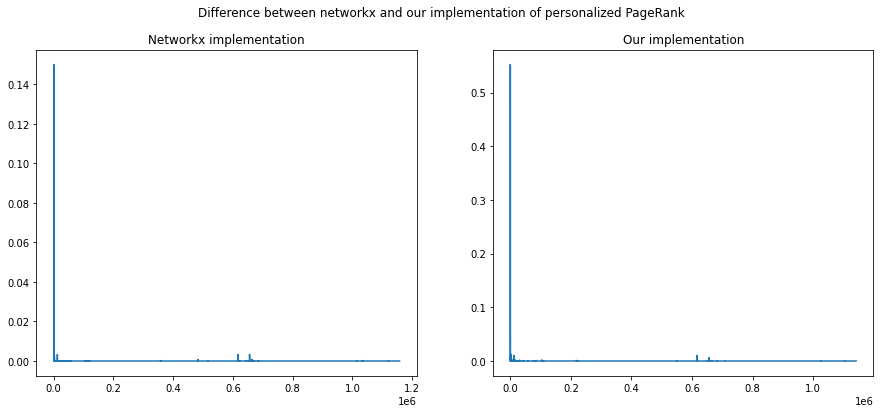

In [7]:
# Import a network with about 1135k nodes
path = 'data/youtube_1135000.txt'
G = nx.read_edgelist(path, delimiter='\t', nodetype=int)
A = nx.linalg.graphmatrix.adjacency_matrix(G)
print(nx.info(G))
print()

# Save the number of nodes
nodes_vector[3] = G.number_of_nodes()

# Compute our Personalized PageRank and save the execution time
start = time.time()
p = approximatePageRank(G, personalization_vector, alpha, epsilon)
stop = time.time()
t = str(stop-start)[0:8]
our_times_vector[3] = float(t)
print('Our implementation of ApproximatePageRank of the node', node_target)
print('Elapsed time:', t, 'seconds')
p_vector = arrayFromDict(p)

# Compute networkx PageRank and save the execution time
start = time.time()
pr = nx.pagerank(G, personalization=personalization_vector, max_iter=20, weight=None)
stop = time.time()
t = str(stop-start)[0:8]
nx_times_vector[3] = float(t)
print('Networkx implementation of PageRank')
print('Elapsed time:', t, 'seconds\n')
pr_vector = arrayFromDict(pr)

# Plot the difference between the two solutions
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle('Difference between networkx and our implementation of personalized PageRank')
axs[0].plot(pr_vector)
axs[0].set_title('Networkx implementation')
axs[1].plot(p_vector)
axs[1].set_title('Our implementation')
plt.show()

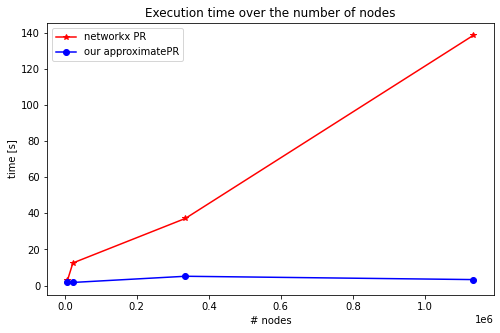

In [9]:
# Plot the execution time over the number of the nodes of both the implementation
plt.figure(figsize=(8,5))
plt.plot(nodes_vector, nx_times_vector, 'r*-', label='networkx PR')
plt.plot(nodes_vector, our_times_vector, 'bo-', label='our approximatePR')
plt.title('Execution time over the number of nodes')
plt.xlabel('# nodes')
plt.ylabel('time [s]')
plt.legend()
plt.show()